# [Stochastic Calculus with Python: Simulating Stock Price Dynamics](https://jtsulliv.github.io/stock-movement/)

In [29]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 5
N = 2. ** 6

In [5]:
def Brownian(seed, N):
    np.random.seed(seed)
    dt = 1. / N # time step
    b = np.random.normal(0., 1., int(N)) * np.sqrt(dt) # brownian increments
    W = np.cumsum(b) # brownian path
    return W, b

In [6]:
b = Brownian(seed, N)[1]

In [7]:
W = Brownian(seed, N)[0]
W = np.insert(W, 0, 0.) # W_0 = 0. for brownian motion

In [12]:
b.shape, W.shape

((64L,), (65L,))

Text(0.5,1,'Brownian Increments')

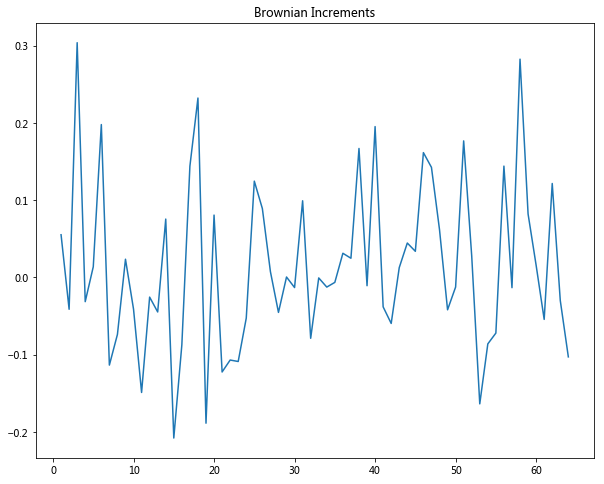

In [8]:
plt.rcParams['figure.figsize'] = (10,8)
xb = np.linspace(1, len(b), len(b))
plt.plot(xb, b)
plt.title('Brownian Increments')

Text(0.5,1,'Brownian Motion')

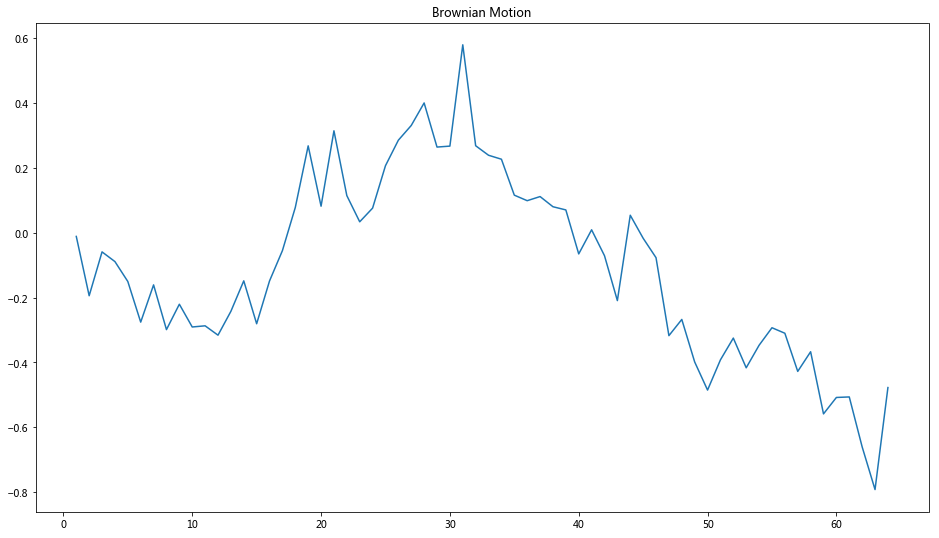

In [36]:
# brownian motion
xw = np.linspace(1, len(W), len(W))
plt.figure(figsize=(16, 9))
plt.plot(xw, W)
plt.title('Brownian Motion')

In [25]:
# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in xrange(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

In [17]:
So = 55.25
mu = 0.15
sigma = 0.4
W = Brownian(seed, N)[0]
T = 1.
N = 2.**5

In [19]:
soln, t = GBM(So, mu, sigma, W, T, N)

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'Geometric Brownian Motion')

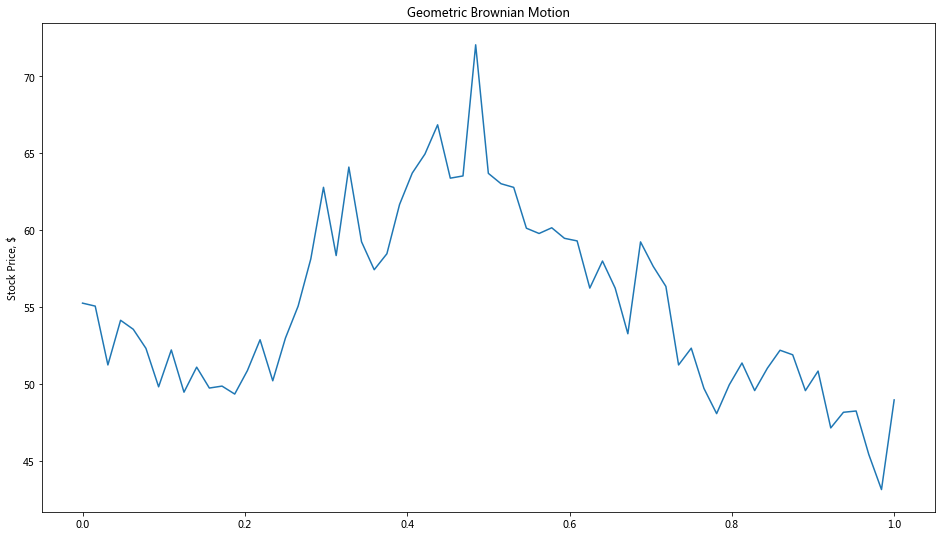

In [35]:
plt.figure(figsize=(16, 9))
plt.plot(t, soln)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'Geometric Brownian Motion')

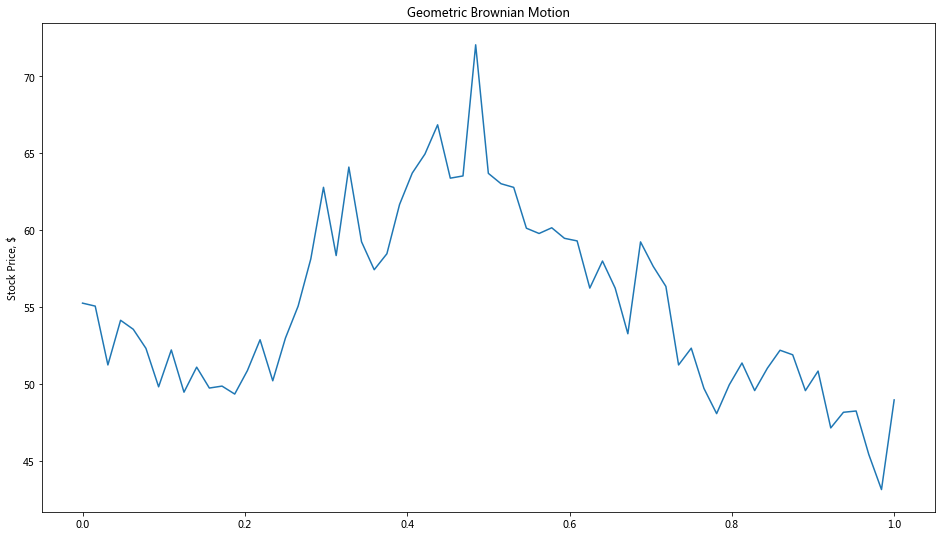

In [34]:
So = 55.25
mu = 0.15
sigma = 0.4
seed = 22
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln, t = GBM(So, mu, sigma, W, T, N)

plt.figure(figsize=(16, 9))
plt.plot(t, soln)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')

In [30]:
start = "2016-01-01"
end = "2016-12-31"

df = quandl.get("WIKI/AMZN", start_date = start, end_date = end)

In [31]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,656.29,657.715,627.51,636.99,9314519.0,0.0,1.0,656.29,657.715,627.51,636.99,9314519.0
2016-01-05,646.86,646.910,627.65,633.79,5822603.0,0.0,1.0,646.86,646.910,627.65,633.79,5822603.0
2016-01-06,622.00,639.790,620.31,632.65,5329197.0,0.0,1.0,622.00,639.790,620.31,632.65,5329197.0
2016-01-07,621.80,630.000,605.21,607.94,7074915.0,0.0,1.0,621.80,630.000,605.21,607.94,7074915.0
2016-01-08,619.66,624.140,606.00,607.05,5512915.0,0.0,1.0,619.66,624.140,606.00,607.05,5512915.0


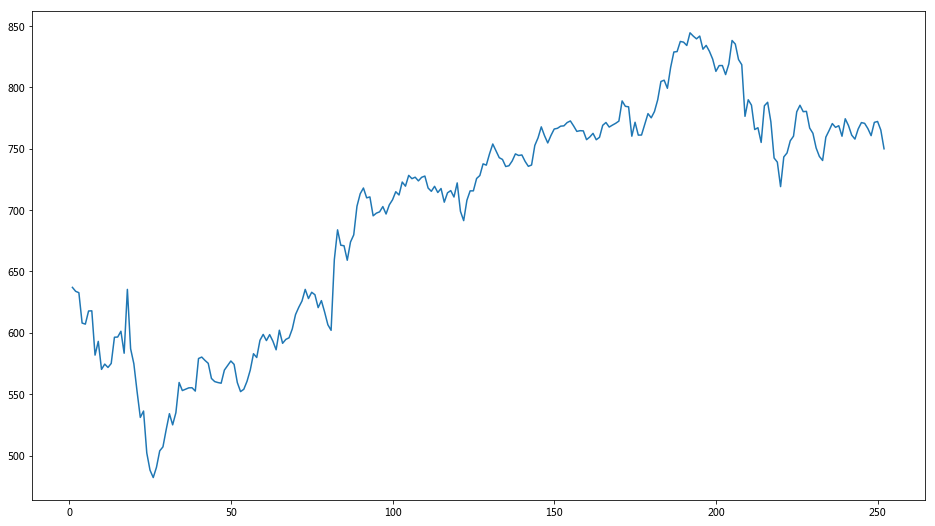

In [33]:
adj_close = df['Adj. Close']
time = np.linspace(1, len(adj_close), len(adj_close))

plt.figure(figsize=(16, 9))
plt.plot(time, adj_close)

In [37]:
def daily_return(adj_close):
    returns = []
    for i in xrange(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/today
        returns.append(daily_return)
    return returns

In [38]:
returns = daily_return(adj_close)

In [39]:
mu = np.mean(returns)*252.           # drift coefficient
sig = np.std(returns)*np.sqrt(252.)  # diffusion coefficient

In [40]:
mu, sig

(0.12161522807385343, 0.29012826236714423)

In [41]:
seed = 22
So = adj_close[0]            # Initial AMZN stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5,1,'Geometric Brownian Motion - AMZN')

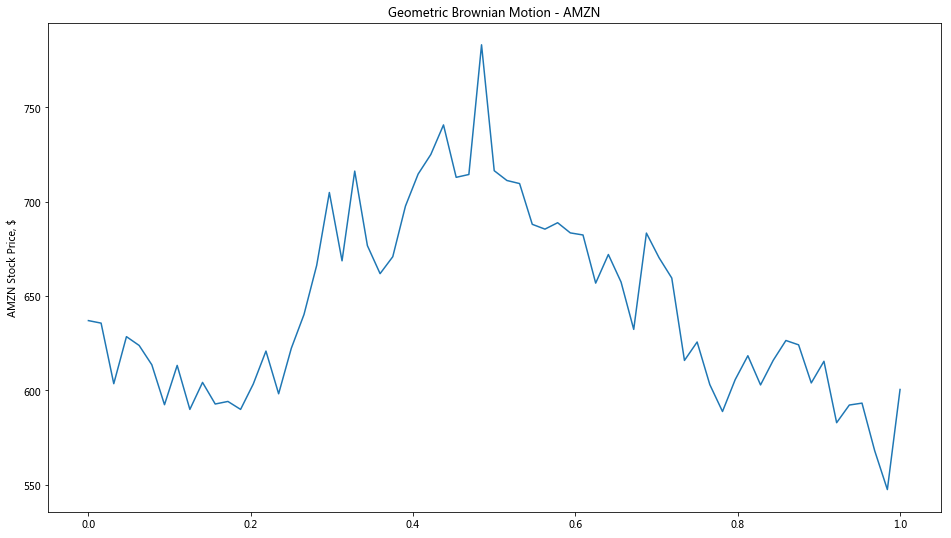

In [43]:
soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.figure(figsize=(16, 9))
plt.plot(t, soln)
plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

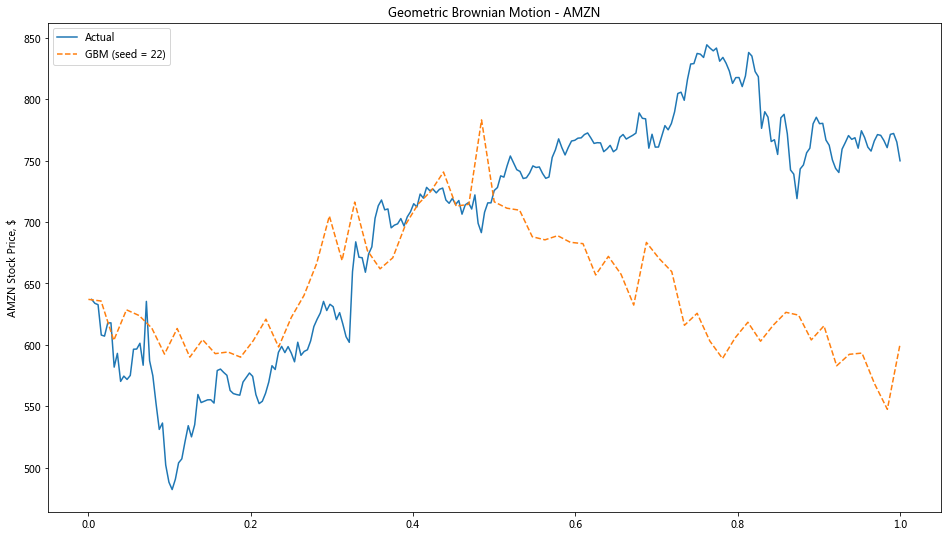

In [46]:
# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.figure(figsize=(16, 9))
plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls='--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


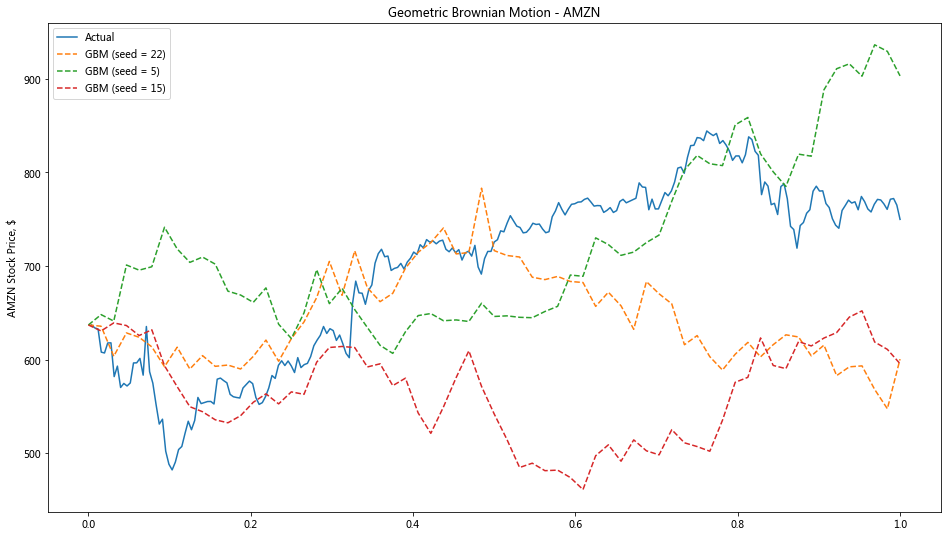

In [47]:
T = 1.
N = 2.**6
So = adj_close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(adj_close), len(adj_close))
time = [i/252. for i in time]

plt.figure(figsize=(16, 9))
plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 15)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')


C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


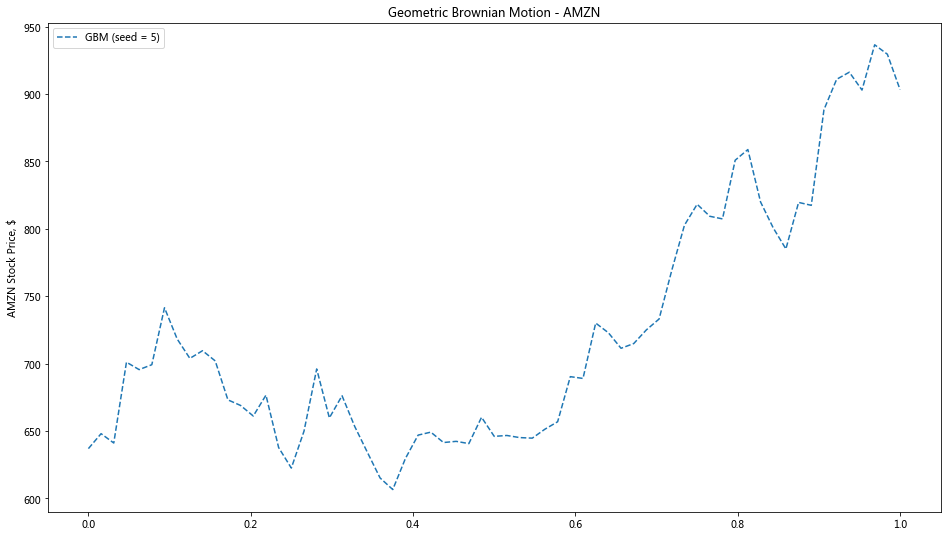

In [48]:
T = 1.
N = 2.**6
So = adj_close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

plt.figure(figsize=(16, 9))
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')

plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


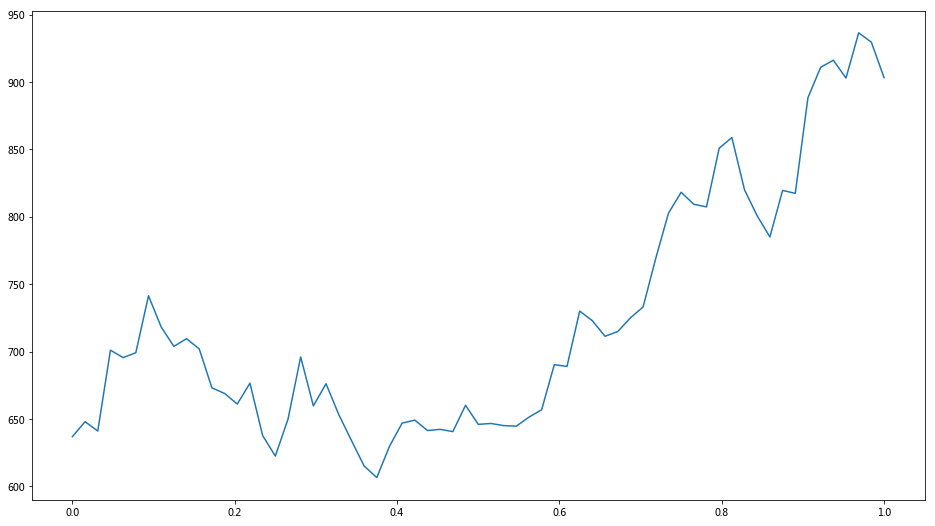

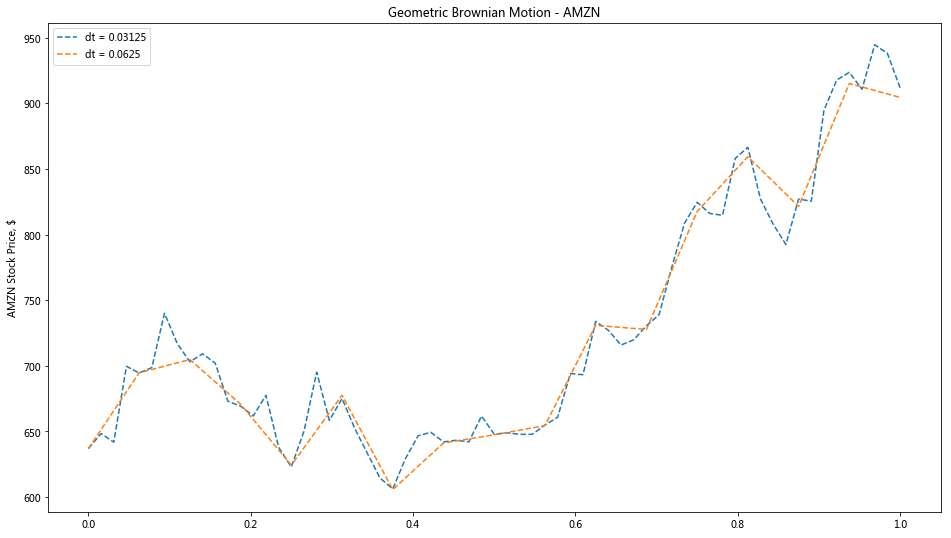

In [50]:
# Exact solution - GBM Model
seed = 5
So = adj_close[0]            # Initial AMZN stock price (01/01/2016)
W = Brownian(seed, N)[0]
T = 1.
N = 2.**6

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.figure(figsize=(16, 9))
plt.plot(t, soln, label ='GBM')


# Euler Maruyama Approximation
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    L = N / M
    wi = [So]
    for i in xrange(0,int(L)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt


# Changing the time step sizes
#
# dt = 0.03125
b = Brownian(5, N)[1]    # Brownian increments 
M = 1                    
L = N/M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0.,1.,L+1)

# dt = 0.0625
b = Brownian(5, N)[1]    # Brownian increments 
M = 4                    
L = N/M
EM_approx_2 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_2 = np.linspace(0.,1.,L+1)

plt.figure(figsize=(16, 9))
plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')
plt.plot(time_EM_2, EM_approx_2, label = 'dt = 0.0625', ls ='--')


plt.ylabel('AMZN Stock Price, $')
plt.title('Geometric Brownian Motion - AMZN')

plt.legend(loc = 'upper left')